# (Spam Ham) Naive Bayes Classifier

## Importing the Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [11]:

docs=pd.read_table('spamhamdataset',header=None,names=['Class','SMS'])
docs

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
docs.head()

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
docs.SMS.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: SMS, dtype: object

In [14]:
docs.shape

(5572, 2)

In [15]:
docs.describe()

,Class,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
docs.isna().mean().sum()

np.float64(0.0)

### Mapping the label as spam and ham 

In [18]:
docs['Label']=docs.Class.map({'ham':0,'spam':1})
docs.head()

,Class,SMS,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [19]:
x=docs.SMS
y=docs.Label

In [20]:
x.shape

(5572,)

In [21]:
y.shape

(5572,)

In [22]:
from sklearn.model_selection import train_test_split as  tts

In [23]:
X_train,x_test,Y_train,y_test=tts(x,y,test_size=0.30)

In [24]:
X_train.shape

(3900,)

In [25]:
x_test.shape

(1672,)

In [26]:
Y_train.shape

(3900,)

In [27]:
y_test.shape

(1672,)

In [28]:
X_train.head()

5471                                                  Yup
394     Yes i think so. I am in office but my lap is i...
3616    I enjoy watching and playing football and bask...
734     Even u dont get in trouble while convincing..j...
3439                            Its good to hear from you
Name: SMS, dtype: object

In [29]:
Y_train.head()

5471    0
394     0
3616    0
734     0
3439    0
Name: Label, dtype: int64

## Vectorizing the text : Data Transformation 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer as cvec

In [31]:
vector=cvec()

In [ ]:
vector.fit([x[0]])
print(vector.vocabulary_)
newval=vector.transform([x[0]])
print(newval)
vector.get_feature_names_out()
print(newval.toarray())

### Removing stop words. Stopwords are the words which are used commonly in sentences or words we speak or text we need to remove those to make it effcient 

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopword=set(stopwords.words('english'))
print(stopwords)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vector=CountVectorizer(stop_words=('english'))

In [34]:
vector.fit([x[0]])
print(vector.vocabulary_)
vector.transform([x[0]])
vector.get_feature_names_out()


{'jurong': 8, 'point': 10, 'crazy': 5, 'available': 1, 'bugis': 3, 'great': 7, 'world': 12, 'la': 9, 'buffet': 2, 'cine': 4, 'got': 6, 'amore': 0, 'wat': 11}


array(['amore', 'available', 'buffet', 'bugis', 'cine', 'crazy', 'got',
       'great', 'jurong', 'la', 'point', 'wat', 'world'], dtype=object)

### Training the entire xtrain 

In [35]:
from sklearn.feature_extraction.text import CountVectorizer as countvc
vectorsn=countvc(stop_words=('english'))

In [36]:
vectorsn.fit(X_train)

CountVectorizer(stop_words='english')

In [37]:
vectorsn.vocabulary_

{'yup': 6905,
 'yes': 6870,
 'think': 6117,
 'office': 4406,
 'lap': 3620,
 'room': 5232,
 'thats': 6095,
 'days': 1975,
 'didnt': 2089,
 'shut': 5515,
 'enjoy': 2347,
 'watching': 6615,
 'playing': 4698,
 'football': 2649,
 'basketball': 1117,
 'outdoors': 4500,
 'dont': 2186,
 'trouble': 6298,
 'convincing': 1813,
 'just': 3488,
 'tel': 6039,
 'twice': 6330,
 'neglect': 4262,
 'msgs': 4161,
 'read': 5017,
 'reply': 5142,
 'good': 2873,
 'hear': 3037,
 'tried': 6291,
 'sms': 5625,
 'video': 6505,
 'mobile': 4091,
 '750': 563,
 'mins': 4047,
 'unlimited': 6405,
 'text': 6073,
 'free': 2691,
 'camcorder': 1465,
 '08000930705': 49,
 'howz': 3168,
 'pain': 4533,
 'come': 1723,
 'today': 6197,
 'said': 5287,
 'ystrday': 6898,
 'ice': 3216,
 'medicine': 3983,
 'asked': 986,
 'anthony': 903,
 'dad': 1948,
 'bf': 1201,
 'sis': 5550,
 'catching': 1522,
 'afternoon': 786,
 'wan': 6592,
 'watch': 6611,
 'tmr': 6188,
 'lor': 3788,
 'hmmm': 3102,
 'opener': 4450,
 'sorry': 5680,
 'll': 3748,
 'lat

In [38]:
vectorsn.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zouk', 'èn', 'ú1'], dtype=object)

In [39]:
X_train_trans=vectorsn.fit_transform(X_train)
X_train_trans.shape

(3900, 6918)

In [40]:
x_test_trans=vectorsn.transform(x_test)
x_test_trans.shape

(1672, 6918)

## Importing naive bayes and it uses BernouliiNB 

In [41]:
from sklearn.naive_bayes import BernoulliNB as bnb

In [42]:
naive=bnb()

In [43]:
naive.fit(X_train_trans,Y_train)

BernoulliNB()

In [44]:
naive_pred=naive.predict(x_test_trans)
print(naive_pred)

[0 0 1 ... 0 0 0]


### Predict Posterior Probablity 

In [45]:
naive_prob=naive.predict_proba(x_test_trans)
print(naive_prob)

[[1.00000000e+00 4.81773576e-11]
 [9.99999999e-01 5.89935508e-10]
 [2.63477465e-05 9.99973652e-01]
 ...
 [9.99999989e-01 1.09909188e-08]
 [9.99999999e-01 6.63084771e-10]
 [9.99999999e-01 1.43131167e-09]]


### Predicting with Single value -- We only need to do transform data not fit transform because bernoulli wont accept thing if its column feature doesnt matches 

In [50]:
val="Government agencies like the IRS will not contact you via email, phone or text message. If any legitimate government agency needs to contact you, they will usually do so via mail or certified letter."
out=docs.Label.iloc[2]
print(val)
print(out)

Government agencies like the IRS will not contact you via email, phone or text message. If any legitimate government agency needs to contact you, they will usually do so via mail or certified letter.
1


In [51]:
transf_sin_val=vectorsn.transform([val])

In [52]:
transf_sin_val.shape

(1, 6918)

In [54]:
pred_sin_val=naive.predict(transf_sin_val)

pred_prob_sin_value=naive.predict_proba(transf_sin_val)
value=np.array(pred_prob_sin_value)

prob_value = f"{value[0, 0]:.4f}"
print(f"Output from Predictor: {pred_sin_val}")

print(f"Output Probability from Predictor: {prob_value}")
print(f"Actual Output : {out}")

Output from Predictor: [0]
Output Probability from Predictor: 1.0000
Actual Output : 1


## Checking the Metrics of the model

In [56]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score as acc, precision_score as ps,classification_report as cr
from sklearn.metrics import auc,roc_auc_score,roc_curve

In [57]:
confuse=cm(y_test,naive_pred)
print(confuse)

[[1453    0]
 [  42  177]]


In [58]:
accuracy=acc(y_test,naive_pred)
accuracy

0.9748803827751196

In [81]:
precision=ps(y_test,naive_pred)
print(precision)

1.0


In [60]:
classreport=cr(y_test,naive_pred)
print(classreport)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.81      0.89       219

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672



In [57]:
qnum=auc(x_test_trans,naive_pred)
print(qnum)

InvalidParameterError: The 'x' parameter of auc must be an array-like. Got <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11415 stored elements and shape (1672, 6929)> instead.

In [61]:
auc_roc=roc_auc_score(y_test,naive_pred)
print(auc_roc)

0.904109589041096


In [62]:
curve=roc_curve(y_test,naive_pred)
print(curve)

(array([0., 0., 1.]), array([0.        , 0.80821918, 1.        ]), array([inf,  1.,  0.]))


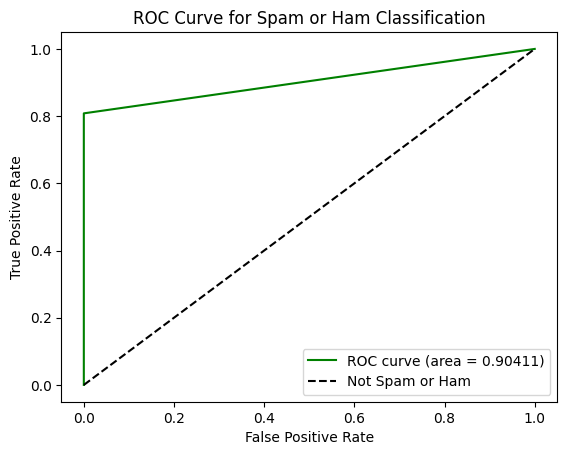

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, naive_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Not Spam or Ham')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Spam or Ham Classification')
plt.legend()
plt.show()

# Exporting the model using pickle

In [51]:
import pickle as pk

In [52]:
pk.dump(naive,open('Spam_pred_algorithm.sav','wb'))